In [ ]:
#https://github.com/jim-easterbrook/python-gphoto2/tree/master/examples

In [41]:
!ps aux | grep gphoto

mbu         1931  0.0  0.0   6892  3304 pts/1    Ss+  14:32   0:00 /bin/bash -c ps aux | grep gphoto
mbu         1933  0.0  0.0   6432   720 pts/1    S+   14:32   0:00 grep gphoto


In [ ]:
#!systemctl stop gvfs-gphoto2-volume-monitor
#jupyter-notebook --ip IP --port PORT


==== AUTHENTICATING FOR org.freedesktop.systemd1.manage-units ===
Authentication is required to stop 'gvfs-gphoto2-volume-monitor.service'.
Authenticating as: mbu
Password: 

In [42]:
!pkill -f gphoto2

In [43]:
!gphoto2 --auto-detect

Modell                         Port                                            
----------------------------------------------------------
Canon EOS 1000D                usb:002,007     


In [6]:
!lsusb

Bus 003 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 007 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub
Bus 006 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub
Bus 002 Device 002: ID 04a9:317b Canon, Inc. Canon Digital Camera
Bus 002 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 005 Device 002: ID 0bf8:1006 Fujitsu Siemens Computers SmartCard Reader 2A
Bus 005 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 004 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub


In [4]:
import gphoto2 as gp
import mediapipe as mp

In [59]:
camera = gp.Camera()
#camera.init()
camera.wait_for_event(100)
camera.get_config()
text = camera.get_summary()
print('Summary')
print('=======')
print(str(text))
camera.exit()

GPhoto2Error: [-105] Unknown model

In [32]:
#camera = gp.Camera()
#camera.init()
camera = gp.check_result(gp.gp_camera_new())
gp.check_result(gp.gp_camera_init(camera))
text = gp.check_result(gp.gp_camera_get_summary(camera))
print('Summary')
print('=======')
print(text.text)
#gp.check_result(gp.gp_camera_exit(camera))

Summary
Manufacturer: Canon Inc.
Model: Canon EOS 1000D
  Version: 3-1.0.7
  Serial Number: c8f59bba185f48739b3a6fa086c2abb3
Vendor Extension ID: 0xb (2.0)
Vendor Extension Description: 

Capture Formats: JPEG
Display Formats: Association/Directory, Script, DPOF, MS AVI, MS Wave, JPEG, CRW, Unknown(b103), Unknown(bf02), Defined Type

Device Capabilities:
	File Download, File Deletion, File Upload
	No Image Capture, No Open Capture, Canon EOS Capture

Storage Devices Summary:

Device Property Summary:
Property 0xd402:(read only) (type=0xffff) 'Canon EOS 1000D'
Property 0xd407:(read only) (type=0x6) 1
Property 0xd406:(readwrite) (type=0xffff) 'Unknown Initiator'



In [17]:
camera_file = gp.check_result(gp.gp_camera_capture_preview(camera))
file_data = gp.check_result(gp.gp_file_get_data_and_size(camera_file))

In [18]:
data = memoryview(file_data)

In [19]:
print(type(data), len(data))

<class 'memoryview'> 64837


In [20]:
print(data[:10].tolist())

[255, 216, 255, 196, 1, 162, 0, 0, 1, 5]


In [21]:
gp.check_result(gp.gp_camera_exit(camera))

0

In [31]:
#import matplotlib.pyplot as plt
from PIL import Image
import io
import datetime

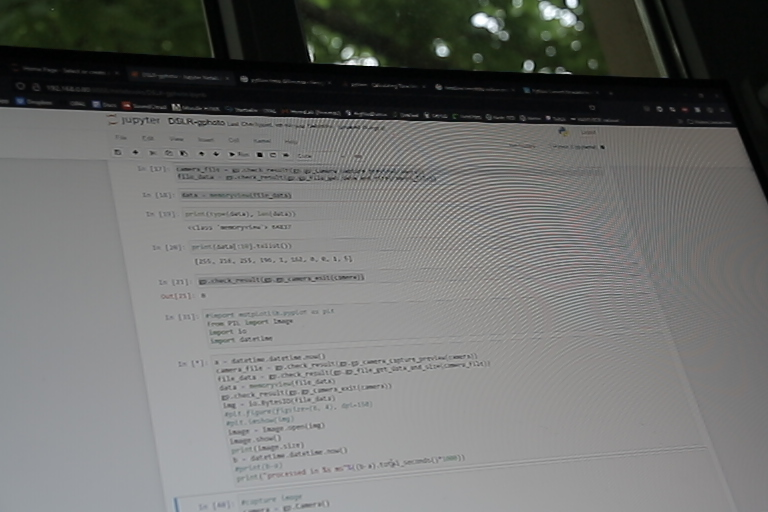

(768, 512)
processed in 896.221 ms


In [51]:
a = datetime.datetime.now()
camera_file = gp.check_result(gp.gp_camera_capture_preview(camera))
file_data = gp.check_result(gp.gp_file_get_data_and_size(camera_file))
data = memoryview(file_data)
gp.check_result(gp.gp_camera_exit(camera))
img = io.BytesIO(file_data)
#plt.figure(figsize=(6, 4), dpi=150)
#plt.imshow(img)
image = Image.open(img)
image.show()
print(image.size)
b = datetime.datetime.now()
#print(b-a)
print("processed in %s ms"%((b-a).total_seconds()*1000))

In [40]:
#capture image
camera = gp.Camera()
camera.init()
print('Capturing image')
file_path = camera.capture(gp.GP_CAPTURE_IMAGE)
print('Camera file path: {0}/{1}'.format(file_path.folder, file_path.name))
target = os.path.join('/tmp', file_path.name)
#print('Copying image to', target)
#camera_file = camera.file_get(file_path.folder, file_path.name, gp.GP_FILE_TYPE_NORMAL)
#camera_file.save(target)
#subprocess.call(['xdg-open', target])
camera.exit()

Capturing image
Camera file path: //capt0000.jpg


NameError: name 'os' is not defined

In [56]:
def getPreview(cam):
    a = datetime.datetime.now()
    camera_file = gp.check_result(gp.gp_camera_capture_preview(cam))
    file_data = gp.check_result(gp.gp_file_get_data_and_size(camera_file))
    data = memoryview(file_data)
    #camera.capture(gp.GP_CAPTURE_IMAGE)
    gp.check_result(gp.gp_camera_exit(cam))
    img = io.BytesIO(file_data)
    image = Image.open(img)
    print(image.size)
    b = datetime.datetime.now()
    print("processed preview in %s ms"%((b-a).total_seconds()*1000))
    return image

(768, 512)
processed preview in 1294.5420000000001 ms


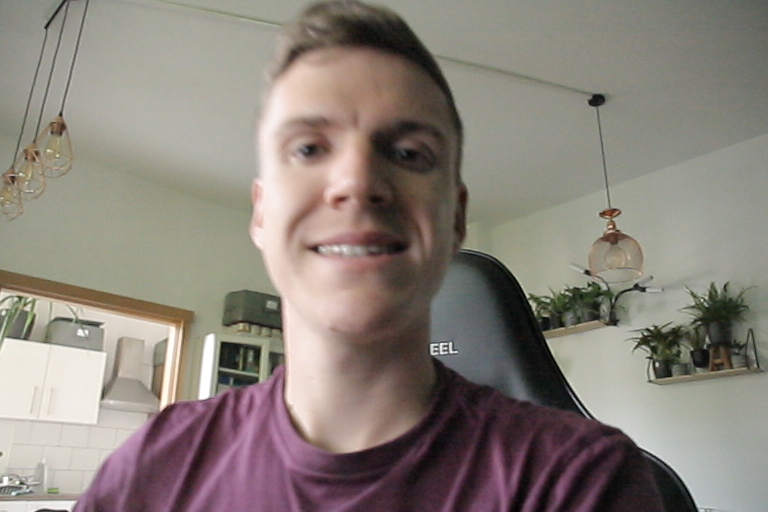

In [19]:
import gphoto2 as gp
from PIL import Image
import io
import datetime
import time
camera = gp.Camera()
camera.wait_for_event(100)
camera.get_config()

def getPreview(cam):
    a = datetime.datetime.now()
    camera_file = gp.check_result(gp.gp_camera_capture_preview(cam))
    file_data = gp.check_result(gp.gp_file_get_data_and_size(camera_file))
    data = memoryview(file_data)
    gp.check_result(gp.gp_camera_exit(camera))
    #camera.capture(gp.GP_CAPTURE_IMAGE)
    image_io = io.BytesIO(file_data)
    image = Image.open(image_io)
    print(image.size)
    b = datetime.datetime.now()
    print("processed preview in %s ms"%((b-a).total_seconds()*1000))
    return image,image_io

#image is PIL Image; image_io is BytesIO representation of image --> used to convert to cv2
image,image_io = getPreview(camera)
image.show()
print(image_io)
#for i in range(10):
#    getPreview(camera).show()
#    time.sleep(1000)

#_ = gp.check_result(gp.gp_camera_exit(camera))


# convert BytesIO image to cv2 image

import numpy as np
import cv2 as cv
import io

image_stream = io.BytesIO()
image_stream.write(connection.read(image_len))
image_stream.seek(0)
file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
img = cv.imdecode(file_bytes, cv.IMREAD_COLOR)

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
print(image_io)
image_io.seek(0)
org_img = cv2.imdecode(np.frombuffer(image_io.read(), np.uint8), 1)

# Combine camera preview with cv2 face detection

(512, 768, 3)
(170, 256, 3)


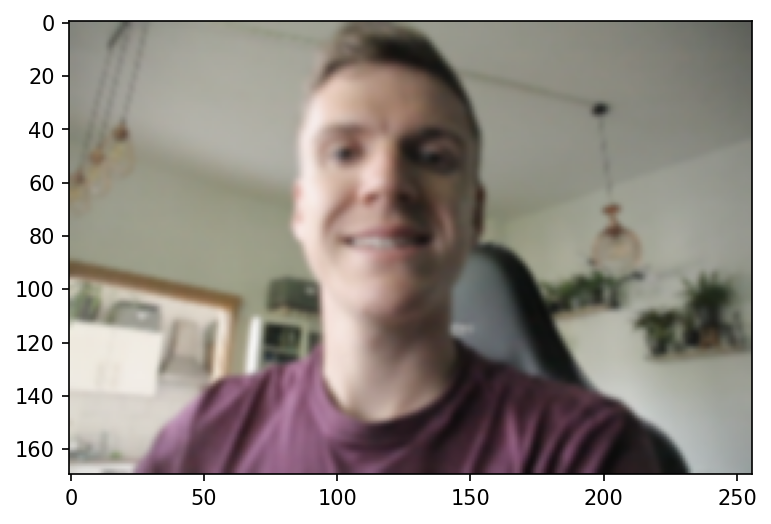

In [22]:
#org_img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
#org_img = cv2.imread('test_gesicht3.jpg')
h_org,w_org,temp = org_img.shape
print(org_img.shape)
reduce_factor = 3
img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
plt.figure(figsize=(6, 4), dpi=150)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

[[77 17 81 81]]
[25]
[6.3621071]


<Figure size 432x288 with 0 Axes>

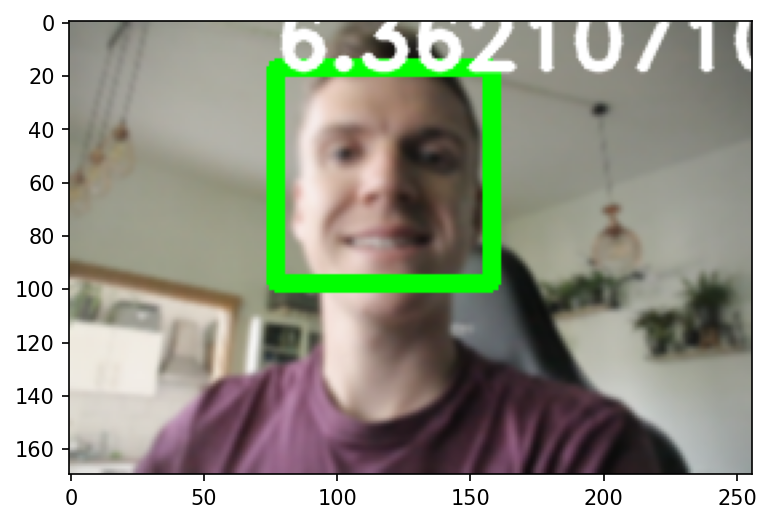

In [23]:
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.01, minNeighbors=15, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)
score_val = 5
i = 0
plt.clf()
faces = 0
for (x, y, w, h) in face_boxes:
  if (levelWeights[i]>score_val):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
    #cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(img,str(levelWeights[i]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    faces = faces + 1
  i = i + 1
plt.figure(figsize=(6, 4), dpi=150)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
#cv2.imwrite("face_detected.jpg", img)



# Gesture detection

### import and declare functions

In [3]:
import mediapipe as mp
import gphoto2 as gp
from PIL import Image
import io
import datetime
import time
import os


def getPreview(cam):
    a = datetime.datetime.now()
    camera_file = gp.check_result(gp.gp_camera_capture_preview(cam))
    file_data = gp.check_result(gp.gp_file_get_data_and_size(camera_file))
    data = memoryview(file_data)
    gp.check_result(gp.gp_camera_exit(camera))
    #camera.capture(gp.GP_CAPTURE_IMAGE)
    image_io = io.BytesIO(file_data)
    image = Image.open(image_io)
    print(image.size)
    b = datetime.datetime.now()
    print("processed preview in %s ms"%((b-a).total_seconds()*1000))
    return image,image_io
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.8)
mpDraw = mp.solutions.drawing_utils

def calc_landmark_center(landmarks):
    ###for simplicity get average of landmarks and use this as center for a hand
    x = 0
    y = 0
    samples = len(landmarks)
    for lm in landmarks:
        x = x + lm[0]
        y = y + lm[1]
    x = int(x/samples)
    y = int(y/samples)
    return x,y

def get_thumb_orientation(landmarks,show_debug):
    ###return the orientation of the hand: true = thumbsup; false = thumbsdown
    max_y = 0
    min_y = 1000000
    samples = len(landmarks)
    for lm in landmarks:
        if lm[1] > max_y:
            max_y = lm[1]
        if lm[1] <= min_y:
            min_y = lm[1]
    
    #lm[4] #thumb landmark

    dist_top = max_y - landmarks[4][1]
    
    dist_bottom = min_y - landmarks[4][1]
    
    if dist_bottom == 0.0:
        orientation = True #thumbsup
        if show_debug:
            print("thumbsup")
    elif dist_top == 0.0:
        orientation = False #thumbsdown
        if show_debug:
            print("thumbsdown")
    
    if ((dist_bottom != 0.0) and (dist_top != 0.0)):
        valid = False
        orientation = False
    else:
        valid = True
    
    
    
    if show_debug:
        print("hand landmark.y from %s to %s"%(min_y,max_y))
        print("thumb landmark: %s"%landmarks[4][1])
        print("distance top: %s"%dist_top)
        print("distance bottom: %s"%dist_bottom)
    #print(max_y,min_y)
    
    return orientation,valid

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


### get camera input 

(768, 512)
processed preview in 86.843 ms
(512, 768, 3)
(170, 256, 3)


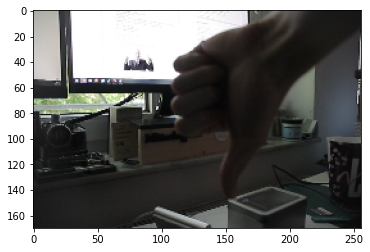

In [25]:
camera = gp.Camera()
camera.wait_for_event(100)
#camera.get_config()
image,image_io = getPreview(camera)
#image.show()
print(image_io)
print(image_io)
image_io.seek(0)
org_img = cv2.imdecode(np.frombuffer(image_io.read(), np.uint8), 1)
thumbs_img = org_img
h_org,w_org,temp = thumbs_img.shape
print(thumbs_img.shape)
reduce_factor = 3
thumbs_img = cv2.resize(thumbs_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
#thumbs_img = cv2.GaussianBlur(thumbs_img, (5,5), 0)
framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
plt.clf()
plt.imshow(framergb)
x , y, c = framergb.shape
print(framergb.shape)

### process frame to detect hand landmarks

In [26]:
# Get hand landmark prediction

#process twice due to better results
counter = 0
while counter < 2:
    result = hands.process(framergb)
    #className = ''
    # post process the result
    if result.multi_hand_landmarks:
        print("found hand landmarks")
        landmarks_pred = []
        landmarks_draw = []
        shape = thumbs_img.shape
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)
                landmarks_pred.append([lmx, lmy])
                landmarks_draw.append([lm.x * shape[1],lm.y * shape[0]])
                cv2.circle(thumbs_img,(int((lmx/x)*y), int((lmy/y)*x)),15,(255, 0, 0))              
            mpDraw.draw_landmarks(thumbs_img, handslms, mpHands.HAND_CONNECTIONS)
    else:
        print("no hand landmarks")
    counter = counter + 1
# Drawing landmarks on frames
#rx,ry = calc_landmark_center(landmarks_draw)
#thumb_up_down = get_thumb_orientation(landmarks_draw,False)
#print(rx,ry)
#_ = cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))

no hand landmarks
found hand landmarks


landmark calculation: thumb_down


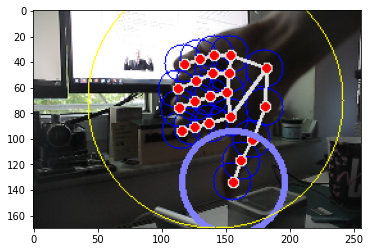

In [27]:
# Predict gesture in Hand Gesture Recognition project
if result.multi_hand_landmarks:
    for i in range(len(landmarks_pred)//21):
        #predict hand class with model
        #prediction = model.predict([landmarks_pred[i*21:(21+(i*21))]]) #problem with predict if more than one hand is detected
        #prediction = model.predict([landmarks_pred[0:21]])
        #--> landmarks sind dann doppelt so lang wie sie für eine hand sein müssten
        #pred = prediction.flatten()
        #classID = np.argmax(pred[0:len(pred)-1]) #ignore smile

        #className = classNames[classID]
        #print("model prediction: %s"%className)
        #cv2.putText(thumbs_img, className, (10, (50+i*50)), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2, cv2.LINE_AA)


        #seperate thumb up from thumb down based on max y position
        thumb_up_down,valid_thumb_orientation = get_thumb_orientation(landmarks_draw[i*21:(21+(i*21))],False)
        if valid_thumb_orientation:
            if thumb_up_down:
                print("landmark calculation: thumb_up")
            else:
                print("landmark calculation: thumb_down")
            thumb_offset = 4
            cv2.circle(thumbs_img,(int(landmarks_draw[(i*21)+thumb_offset][0]),int(landmarks_draw[(i*21)+thumb_offset][1])),40,(255,128,128),4)
        else:
            print("no thumbs up/down found")

        #get average hand position for future usage
        rx,ry = calc_landmark_center(landmarks_draw[i*21:(21+(i*21))]) 
        cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))
    plt.clf()
    framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
    plt.imshow(framergb)
    #cv2.cvtColor(thumbs_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite("thumbs.jpg", thumbs_img)
else:
    print("no hand landmarks in img")

## gesture detection all in one cell 

In [46]:
import mediapipe as mp
import gphoto2 as gp
from PIL import Image
import io
import datetime
import time


def getPreview(cam):
    a = datetime.datetime.now()
    camera_file = gp.check_result(gp.gp_camera_capture_preview(cam))
    file_data = gp.check_result(gp.gp_file_get_data_and_size(camera_file))
    data = memoryview(file_data)
    gp.check_result(gp.gp_camera_exit(camera))
    #camera.capture(gp.GP_CAPTURE_IMAGE)
    image_io = io.BytesIO(file_data)
    image = Image.open(image_io)
    print(image.size)
    b = datetime.datetime.now()
    print("processed preview in %s ms"%((b-a).total_seconds()*1000))
    return image,image_io
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.8)
mpDraw = mp.solutions.drawing_utils

def calc_landmark_center(landmarks):
    ###for simplicity get average of landmarks and use this as center for a hand
    x = 0
    y = 0
    samples = len(landmarks)
    for lm in landmarks:
        x = x + lm[0]
        y = y + lm[1]
    x = int(x/samples)
    y = int(y/samples)
    return x,y

def get_thumb_orientation(landmarks,show_debug):
    ###return the orientation of the hand: true = thumbsup; false = thumbsdown
    max_y = 0
    min_y = 1000000
    samples = len(landmarks)
    for lm in landmarks:
        if lm[1] > max_y:
            max_y = lm[1]
        if lm[1] <= min_y:
            min_y = lm[1]
    
    #lm[4] #thumb landmark

    dist_top = max_y - landmarks[4][1]
    
    dist_bottom = min_y - landmarks[4][1]
    
    if dist_bottom == 0.0:
        orientation = True #thumbsup
        if show_debug:
            print("thumbsup")
    elif dist_top == 0.0:
        orientation = False #thumbsdown
        if show_debug:
            print("thumbsdown")
    
    if ((dist_bottom != 0.0) and (dist_top != 0.0)):
        valid = False
        orientation = False
    else:
        valid = True
    
    
    
    if show_debug:
        print("hand landmark.y from %s to %s"%(min_y,max_y))
        print("thumb landmark: %s"%landmarks[4][1])
        print("distance top: %s"%dist_top)
        print("distance bottom: %s"%dist_bottom)
    #print(max_y,min_y)
    
    return orientation,valid


camera = gp.Camera()
camera.wait_for_event(100)
image_counter = 0
start = datetime.datetime.now()
while image_counter < 10:
    
    #camera.get_config()
    image,image_io = getPreview(camera)
    #image.show()
    #print(image_io)
    #print(image_io)
    image_io.seek(0)
    org_img = cv2.imdecode(np.frombuffer(image_io.read(), np.uint8), 1)
    thumbs_img = org_img
    h_org,w_org,temp = thumbs_img.shape
    print(thumbs_img.shape)
    reduce_factor = 3
    thumbs_img = cv2.resize(thumbs_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
    #thumbs_img = cv2.GaussianBlur(thumbs_img, (5,5), 0)
    framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
    #plt.clf()
    #plt.imshow(framergb)
    x , y, c = framergb.shape
    #print(framergb.shape)
    # Get hand landmark prediction

    #process twice due to better results
    counter = 0
    while counter < 2:
        result = hands.process(framergb)
        #className = ''
        # post process the result
        if result.multi_hand_landmarks:
            print("found hand landmarks")
            landmarks_pred = []
            landmarks_draw = []
            shape = thumbs_img.shape
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)
                    landmarks_pred.append([lmx, lmy])
                    landmarks_draw.append([lm.x * shape[1],lm.y * shape[0]])
                    #cv2.circle(thumbs_img,(int((lmx/x)*y), int((lmy/y)*x)),15,(255, 0, 0))              
                #mpDraw.draw_landmarks(thumbs_img, handslms, mpHands.HAND_CONNECTIONS)
        else:
            print("no hand landmarks")
        counter = counter + 1
    # Drawing landmarks on frames
    #rx,ry = calc_landmark_center(landmarks_draw)
    #thumb_up_down = get_thumb_orientation(landmarks_draw,False)
    #print(rx,ry)
    #_ = cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))
    # Predict gesture in Hand Gesture Recognition project
    if result.multi_hand_landmarks:
        for i in range(len(landmarks_pred)//21):
            #predict hand class with model
            #prediction = model.predict([landmarks_pred[i*21:(21+(i*21))]]) #problem with predict if more than one hand is detected
            #prediction = model.predict([landmarks_pred[0:21]])
            #--> landmarks sind dann doppelt so lang wie sie für eine hand sein müssten
            #pred = prediction.flatten()
            #classID = np.argmax(pred[0:len(pred)-1]) #ignore smile

            #className = classNames[classID]
            #print("model prediction: %s"%className)
            #cv2.putText(thumbs_img, className, (10, (50+i*50)), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2, cv2.LINE_AA)


            #seperate thumb up from thumb down based on max y position
            thumb_up_down,valid_thumb_orientation = get_thumb_orientation(landmarks_draw[i*21:(21+(i*21))],False)
            if valid_thumb_orientation:
                if thumb_up_down:
                    print("landmark calculation: thumb_up")
                    #cv2.putText(thumbs_img, "thumbs_up", (10, 10), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 1, cv2.LINE_AA)
                else:
                    print("landmark calculation: thumb_down")
                    #cv2.putText(thumbs_img, "thumbs_down", (10, 10), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 1, cv2.LINE_AA)
                thumb_offset = 4
                #cv2.circle(thumbs_img,(int(landmarks_draw[(i*21)+thumb_offset][0]),int(landmarks_draw[(i*21)+thumb_offset][1])),40,(255,128,128),4)
            else:
                print("no thumbs up/down found")

            #get average hand position for future usage
            rx,ry = calc_landmark_center(landmarks_draw[i*21:(21+(i*21))]) 
            cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))
        #plt.clf()
        #framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
        #plt.imshow(framergb)
        #cv2.cvtColor(thumbs_img, cv2.COLOR_RGB2BGR)
        #file_name = "thumbs"+str(image_counter)+".jpg"
        #cv2.imwrite(file_name, thumbs_img)
    else:
        print("no hand landmarks in img")
    
    
    #time.sleep(0.5)
    image_counter = image_counter + 1
end = datetime.datetime.now()
print("average processing time %s ms"%(((end-start).total_seconds()*1000)/image_counter))

(768, 512)
processed preview in 83.23 ms
(512, 768, 3)
no hand landmarks
no hand landmarks
no hand landmarks in img
(768, 512)
processed preview in 413.75 ms
(512, 768, 3)
found hand landmarks
found hand landmarks
landmark calculation: thumb_up
(768, 512)
processed preview in 418.567 ms
(512, 768, 3)
found hand landmarks
found hand landmarks
landmark calculation: thumb_down
(768, 512)
processed preview in 351.989 ms
(512, 768, 3)
found hand landmarks
found hand landmarks
landmark calculation: thumb_up
(768, 512)
processed preview in 356.177 ms
(512, 768, 3)
found hand landmarks
found hand landmarks
landmark calculation: thumb_up
(768, 512)
processed preview in 405.932 ms
(512, 768, 3)
found hand landmarks
found hand landmarks
landmark calculation: thumb_up
(768, 512)
processed preview in 406.941 ms
(512, 768, 3)
found hand landmarks
found hand landmarks
landmark calculation: thumb_up
(768, 512)
processed preview in 413.923 ms
(512, 768, 3)
found hand landmarks
found hand landmarks
no t

Take photo

In [7]:
camera = gp.Camera()
camera.init()
print('Capturing image')
file_path = camera.capture(gp.GP_CAPTURE_IMAGE)
print('Camera file path: {0}/{1}'.format(file_path.folder, file_path.name))
target = os.path.join('.', file_path.name)
print('Copying image to', target)
camera_file = camera.file_get(file_path.folder, file_path.name, gp.GP_FILE_TYPE_NORMAL)
camera_file.save(target)
#subprocess.call(['xdg-open', target])
camera.exit()
#capture image

Capturing image
Camera file path: //capt0000.jpg
Copying image to ./capt0000.jpg


put camera in photo mode (shorter mirror time)

In [23]:
camera = gp.Camera()
camera.init()

In [24]:
camera_config = camera.get_config()
OK, capture = gp.gp_widget_get_child_by_name( camera_config, 'capture' )
#if OK >= gp.GP_OK:
capture.set_value(1)
camera.set_config(camera_config) 
print(camera_config)
print(capture)

<Swig Object of type '_CameraWidget *' at 0x7f5717d4c3f0>
<Swig Object of type '_CameraWidget *' at 0x7f572bfe3eb0>


In [25]:
gp.gp_camera_capture_preview(camera)

[0, <Swig Object of type 'CameraFile *' at 0x7f5717d4ce30>]

In [22]:
camera.exit()